In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

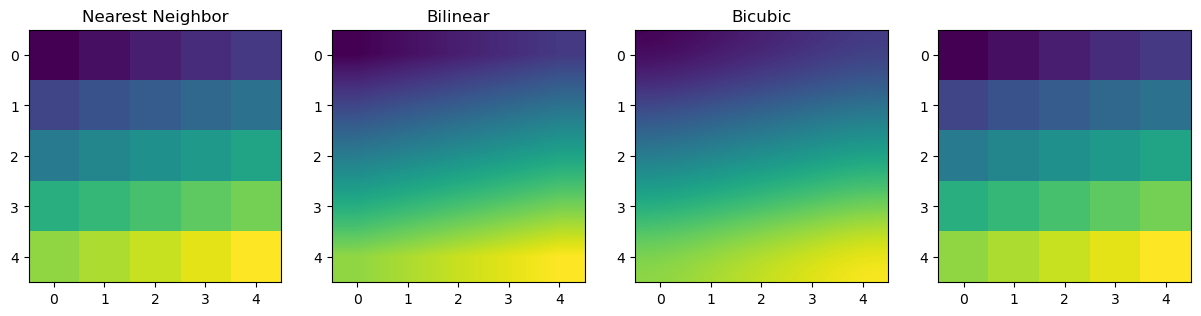

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个简单的 5x5 图像
img = np.array([[0, 1, 2, 3, 4],
                [5, 6, 7, 8, 9],
                [10, 11, 12, 13, 14],
                [15, 16, 17, 18, 19],
                [20, 21, 22, 23, 24]], dtype=np.uint8)

# 放大图像
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# 最近邻插值
axes[0].imshow(img, interpolation='nearest')
axes[0].set_title('Nearest Neighbor')

# 双线性插值
axes[1].imshow(img, interpolation='bilinear')
axes[1].set_title('Bilinear')

# 双三次插值
axes[2].imshow(img, interpolation='bicubic')
axes[2].set_title('Bicubic')

axes[3].imshow(img)

plt.show()

In [2]:
class MNISTDataset(Dataset):
    def __init__(self, root, train=True):
        self.dataset = datasets.MNIST(root, train=train, download=True, transform=transforms.ToTensor())
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        return img, label
    
    def __repr__(self):
        return f"MNISTDataset with {len(self)} samples"
    
    def show_samples(self, num_samples=5):
        for i in range(num_samples):
            img, label = self[i]
            plt.subplot(1, num_samples, i+1)
            plt.imshow(img.squeeze(), cmap='gray') # when (C=1,H,W), remove C
            plt.title(f'Label: {label}')
            plt.axis('off')
        plt.show()

In [3]:
# 创建和测试MNISTDataset类的实例
dataset = MNISTDataset(root='./data', train=True)
print(repr(dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████| 9912422/9912422 [00:06<00:00, 1560058.83it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 312610.66it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1331528.04it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

MNISTDataset with 60000 samples


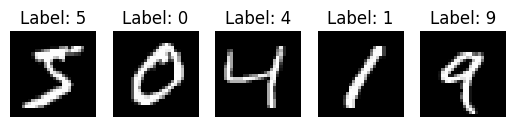

In [4]:
# 显示前五个样本
dataset.show_samples()

In [5]:
# 获取数据集长度
print(f"Dataset length: {len(dataset)}")

Dataset length: 60000


First sample - Label: 5


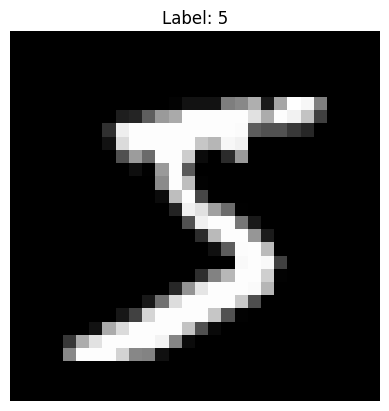

In [6]:
# 获取第一个样本
img, label = dataset[0]
print(f"First sample - Label: {label}")
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

transform=transforms.Compose([
        transforms.ToTensor()])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

train_dataset = NoisyFashionMNIST("./data", True)
test_dataset = NoisyFashionMNIST("./data", False)

x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.axis('off')
plt.show()

## 可视化CNN

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchviz import make_dot
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# 定义神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建一个示例输入
x = torch.randn(1, 1, 28, 28)

# 实例化模型
model = Net()

# 前向传播
y = model(x)

# 生成计算图并保存
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('network_visualization')

print("Network visualization saved as 'network_visualization.png'")


Network visualization saved as 'network_visualization.png'
